### Problem Statement A key challenge for property sellers is to determine the sale price of the property. Some are apparent and obvious, and some are not. Nevertheless, a rational approach aided by machine learning can be very useful in predicting the property price. A large data set with 79 different features (like living area, number of rooms, location, etc) along with their prices are provided for residential homes. The challenge is to learn a relationship between the important features and the price. Further, use it to predict the prices of a new set of houses.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
df_price=pd.concat([train,test],ignore_index=True)

In [5]:
df_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
df_price.drop('Id',axis=1,inplace=True)
df_price.shape

(2919, 80)

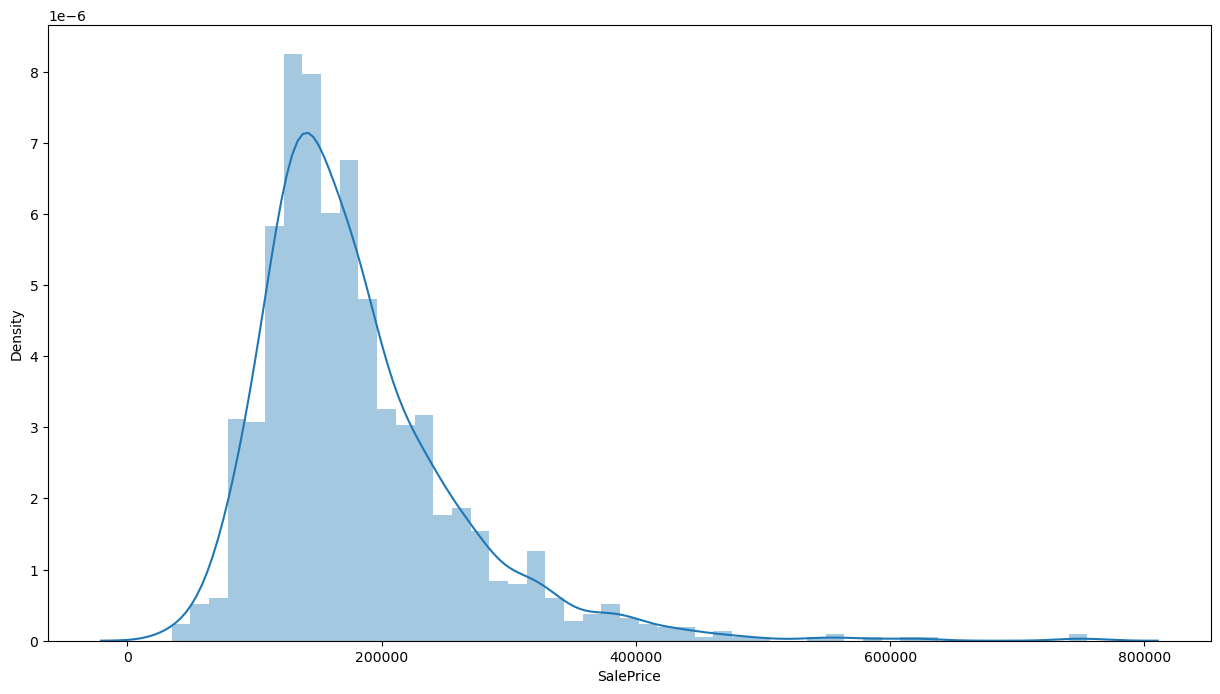

In [7]:
plt.figure(figsize=(15,8))
sns.distplot(df_price['SalePrice'])
plt.show()

In [8]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [9]:
cols=['MSSubClass', 'OverallQual', 'OverallCond']

In [10]:
for i in cols:
    df_price[i]=df_price[i].astype('object')

In [11]:
(df_price.isnull().sum()/df_price.index.size)*100

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

In [12]:
(df_price.isnull().sum()/(df_price.index.size)*100)[(df_price.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
GarageCars       0.034258
GarageArea       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
Electrical       0.034258
dtype: float64

In [13]:
df_num=df_price.select_dtypes(include=np.number)
df_num=df_num.drop('SalePrice',axis=1)

df_cat=df_price.select_dtypes(exclude=np.number)

In [14]:
df_price.shape

(2919, 80)

In [15]:
cols=list(df_num.columns)
cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [16]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [17]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_num_sc=pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [18]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   float64
 2   YearBuilt      2919 non-null   float64
 3   YearRemodAdd   2919 non-null   float64
 4   MasVnrArea     2919 non-null   float64
 5   BsmtFinSF1     2919 non-null   float64
 6   BsmtFinSF2     2919 non-null   float64
 7   BsmtUnfSF      2919 non-null   float64
 8   TotalBsmtSF    2919 non-null   float64
 9   1stFlrSF       2919 non-null   float64
 10  2ndFlrSF       2919 non-null   float64
 11  LowQualFinSF   2919 non-null   float64
 12  GrLivArea      2919 non-null   float64
 13  BsmtFullBath   2919 non-null   float64
 14  BsmtHalfBath   2919 non-null   float64
 15  FullBath       2919 non-null   float64
 16  HalfBath       2919 non-null   float64
 17  BedroomAbvGr   2919 non-null   float64
 18  KitchenA

In [19]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
FireplaceQu     48.646797
GarageQual       5.447071
GarageFinish     5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MSZoning         0.137033
Functional       0.068517
Utilities        0.068517
Electrical       0.034258
KitchenQual      0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
dtype: float64

In [20]:
df_cat.drop(['PoolQC','Alley','Fence','FireplaceQu','MiscFeature','MasVnrType'],axis=1,inplace=True)

In [21]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     2919 non-null   object
 1   MSZoning       2915 non-null   object
 2   Street         2919 non-null   object
 3   LotShape       2919 non-null   object
 4   LandContour    2919 non-null   object
 5   Utilities      2917 non-null   object
 6   LotConfig      2919 non-null   object
 7   LandSlope      2919 non-null   object
 8   Neighborhood   2919 non-null   object
 9   Condition1     2919 non-null   object
 10  Condition2     2919 non-null   object
 11  BldgType       2919 non-null   object
 12  HouseStyle     2919 non-null   object
 13  OverallQual    2919 non-null   object
 14  OverallCond    2919 non-null   object
 15  RoofStyle      2919 non-null   object
 16  RoofMatl       2919 non-null   object
 17  Exterior1st    2918 non-null   object
 18  Exterior2nd    2918 non-null

In [22]:
(df_cat.isnull().sum()/(df_price.index.size)*100)[(df_cat.isnull().sum()/df_price.index.size)*100  > 0].sort_values(ascending=False)

GarageCond      5.447071
GarageQual      5.447071
GarageFinish    5.447071
GarageType      5.378554
BsmtCond        2.809181
BsmtExposure    2.809181
BsmtQual        2.774923
BsmtFinType2    2.740665
BsmtFinType1    2.706406
MSZoning        0.137033
Functional      0.068517
Utilities       0.068517
KitchenQual     0.034258
Electrical      0.034258
Exterior2nd     0.034258
Exterior1st     0.034258
SaleType        0.034258
dtype: float64

In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(df_cat.iloc[:,:])#give mode

In [24]:
df_cat_trans=imputer.transform(df_cat)

In [25]:
df_cat=pd.DataFrame(df_cat_trans,columns=df_cat.columns)

In [26]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    2919 non-null   float64
 1   LotArea        2919 non-null   float64
 2   YearBuilt      2919 non-null   float64
 3   YearRemodAdd   2919 non-null   float64
 4   MasVnrArea     2919 non-null   float64
 5   BsmtFinSF1     2919 non-null   float64
 6   BsmtFinSF2     2919 non-null   float64
 7   BsmtUnfSF      2919 non-null   float64
 8   TotalBsmtSF    2919 non-null   float64
 9   1stFlrSF       2919 non-null   float64
 10  2ndFlrSF       2919 non-null   float64
 11  LowQualFinSF   2919 non-null   float64
 12  GrLivArea      2919 non-null   float64
 13  BsmtFullBath   2919 non-null   float64
 14  BsmtHalfBath   2919 non-null   float64
 15  FullBath       2919 non-null   float64
 16  HalfBath       2919 non-null   float64
 17  BedroomAbvGr   2919 non-null   float64
 18  KitchenA

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc=StandardScaler()

In [29]:
df_num_standarized=pd.DataFrame(sc.fit_transform(df_num_sc),columns=df_num_sc.columns)
df_num_standarized.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,0.348787,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,-0.059898,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962


In [30]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [31]:
import category_encoders as ce

In [32]:
df_priceDataset=pd.concat([df_num_standarized,df_cat],axis=1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,-0.088484,0.137197,0.980221,0.848965,0.332854,0.098133,-0.293098,-0.288671,-0.298944,-0.610718,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,-0.442649,-0.078385,-1.859351,-0.682812,-0.572740,-0.494618,-0.293098,-0.047439,-0.671142,-0.506205,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,0.619846,0.518903,0.947203,0.753229,1.383791,0.469151,-0.293098,-0.161228,0.211694,-0.037170,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [33]:
print('training data',train.shape)
print('testing data',test.shape)

training data (1460, 81)
testing data (1459, 80)


In [34]:
df_train=df_priceDataset.iloc[0:train.shape[0],]
df_train.shape

(1460, 73)

In [35]:
df_train.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [36]:
df_target=np.log(train['SalePrice'])

In [37]:
df_target.shape

(1460,)

In [38]:
df_train=pd.concat([df_train,df_target],axis=1)

In [39]:
df_train.shape

(1460, 74)

In [40]:
df_test=df_priceDataset.iloc[train.shape[0]:,]
df_test.shape

(1459, 73)

In [41]:
df_test.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1460,0.442764,0.184371,-0.340510,-1.113625,-0.572740,0.058616,0.558228,-0.661898,-0.385185,-0.671897,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1461,0.487035,0.519791,-0.439565,-1.257229,0.030989,1.057511,-0.293098,-0.352393,0.629282,0.431865,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   YearBuilt      1459 non-null   float64
 3   YearRemodAdd   1459 non-null   float64
 4   MasVnrArea     1459 non-null   float64
 5   BsmtFinSF1     1459 non-null   float64
 6   BsmtFinSF2     1459 non-null   float64
 7   BsmtUnfSF      1459 non-null   float64
 8   TotalBsmtSF    1459 non-null   float64
 9   1stFlrSF       1459 non-null   float64
 10  2ndFlrSF       1459 non-null   float64
 11  LowQualFinSF   1459 non-null   float64
 12  GrLivArea      1459 non-null   float64
 13  BsmtFullBath   1459 non-null   float64
 14  BsmtHalfBath   1459 non-null   float64
 15  FullBath       1459 non-null   float64
 16  HalfBath       1459 non-null   float64
 17  BedroomAbvGr   1459 non-null   float64
 18  Kitch

In [44]:
df_num_train=df_train.select_dtypes(include=np.number)
df_num_train.shape

(1460, 34)

In [45]:
df_cat_train=df_train.select_dtypes(exclude=np.number)
df_cat_train.shape

(1460, 40)

In [46]:
catboost=ce.cat_boost.CatBoostEncoder()
df_cat_en_train=catboost.fit_transform(df_cat_train,df_target)

In [47]:
df_cat_en_train.head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
1,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.024051,12.135873,12.024051,12.024051,...,12.135873,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873


In [48]:
df_cat_en_train.shape

(1460, 40)

In [49]:
df_train=pd.concat([df_num_train,df_cat_en_train],axis=1)
df_train.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-0.221296,-0.217879,1.046258,0.896833,0.522917,0.581115,-0.293098,-0.934991,-0.444192,-0.773861,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
1,0.442764,-0.072044,0.154764,-0.395604,-0.572740,1.178257,-0.293098,-0.630037,0.477226,0.261075,...,12.135873,12.024051,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873,12.135873


In [50]:
df_train.shape

(1460, 74)

In [51]:
df_num_test=df_test.select_dtypes(include=np.number)
df_num_test.shape

(1459, 33)

In [52]:
df_cat_test=df_test.select_dtypes(exclude=np.number)

In [53]:
df_cat_test.shape

(1459, 40)

In [54]:
df_cat_en_test=catboost.transform(df_cat_test)

In [55]:
df_cat_en_test.shape

(1459, 40)

In [56]:
df_cat_en_test.head(2)

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1460,12.052734,11.765970,12.025521,11.936189,12.022695,12.024183,12.001921,12.020567,11.868735,11.820843,...,12.061412,11.810882,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505
1461,12.052734,12.085831,12.025521,12.163178,12.022695,12.024183,12.027433,12.020567,11.868735,12.042901,...,12.061412,12.221999,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505


In [57]:
df_test=pd.concat([df_num_test,df_cat_en_test],axis=1)
df_test.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1460,0.442764,0.184371,-0.340510,-1.113625,-0.572740,0.058616,0.558228,-0.661898,-0.385185,-0.671897,...,12.061412,11.810882,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505
1461,0.487035,0.519791,-0.439565,-1.257229,0.030989,1.057511,-0.293098,-0.352393,0.629282,0.431865,...,12.061412,12.221999,12.038501,12.103721,11.780706,12.034976,12.037164,12.059868,11.991087,12.00505


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   YearBuilt      1460 non-null   float64
 3   YearRemodAdd   1460 non-null   float64
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   float64
 6   BsmtFinSF2     1460 non-null   float64
 7   BsmtUnfSF      1460 non-null   float64
 8   TotalBsmtSF    1460 non-null   float64
 9   1stFlrSF       1460 non-null   float64
 10  2ndFlrSF       1460 non-null   float64
 11  LowQualFinSF   1460 non-null   float64
 12  GrLivArea      1460 non-null   float64
 13  BsmtFullBath   1460 non-null   float64
 14  BsmtHalfBath   1460 non-null   float64
 15  FullBath       1460 non-null   float64
 16  HalfBath       1460 non-null   float64
 17  BedroomAbvGr   1460 non-null   float64
 18  KitchenA

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 1460 to 2918
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   YearBuilt      1459 non-null   float64
 3   YearRemodAdd   1459 non-null   float64
 4   MasVnrArea     1459 non-null   float64
 5   BsmtFinSF1     1459 non-null   float64
 6   BsmtFinSF2     1459 non-null   float64
 7   BsmtUnfSF      1459 non-null   float64
 8   TotalBsmtSF    1459 non-null   float64
 9   1stFlrSF       1459 non-null   float64
 10  2ndFlrSF       1459 non-null   float64
 11  LowQualFinSF   1459 non-null   float64
 12  GrLivArea      1459 non-null   float64
 13  BsmtFullBath   1459 non-null   float64
 14  BsmtHalfBath   1459 non-null   float64
 15  FullBath       1459 non-null   float64
 16  HalfBath       1459 non-null   float64
 17  BedroomAbvGr   1459 non-null   float64
 18  Kitch

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
X=df_train.drop('SalePrice',axis=1)
y=df_train['SalePrice']

In [62]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.30,random_state=0)

In [63]:
lr=LinearRegression()
model_lr=lr.fit(Xtrain,ytrain)
pred_train=model_lr.predict(Xtrain)
pred_test=model_lr.predict(Xtest)

In [64]:
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)
print('R2 train:',r2_train)
print('R2 test:',r2_test)

R2 train: 0.8990000177570079
R2 test: 0.8193224378211525


In [65]:
print('RMSE train:',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('RMSE test:',np.sqrt(mean_squared_error(ytest,pred_test)))

RMSE train: 0.12774051001050252
RMSE test: 0.1670828991268747


In [66]:
lr=LinearRegression()
y_pred=[]
model_lr=lr.fit(Xtrain,ytrain)
y_pred.append(model_lr.predict(df_test))

In [67]:
pd.DataFrame(y_pred).T

,0
0,11.623015
1,12.018269
2,12.080365
3,12.156065
4,12.230420
...,...
1454,11.326569
1455,11.385856
1456,12.122822
1457,11.688530


In [68]:
y_linear=pd.DataFrame(y_pred).T

In [69]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [70]:
model_prediction=pd.DataFrame({'Id':test.Id,'SalePrice':test.TotalBsmtSF})
model_prediction

,Id,SalePrice
0,1461,882.0
1,1462,1329.0
2,1463,928.0
3,1464,926.0
4,1465,1280.0
...,...,...
1454,2915,546.0
1455,2916,546.0
1456,2917,1224.0
1457,2918,912.0


In [71]:
model_prediction.to_csv('Basic.csv',index=False)

In [72]:
model_prediction['SalePrice']=y_linear

In [73]:
model_prediction.head()

,Id,SalePrice
0,1461,11.623015
1,1462,12.018269
2,1463,12.080365
3,1464,12.156065
4,1465,12.230420


In [74]:
model_prediction['SalePrice']=np.exp(y_linear)

In [75]:
model_prediction.head()

,Id,SalePrice
0,1461,111637.844053
1,1462,165755.409591
2,1463,176374.463178
3,1464,190244.490915
4,1465,204929.221634


In [76]:
model_prediction.to_csv('LinearReg_v3.csv',index=False)

In [77]:
df_train.shape

(1460, 74)

In [78]:
df_test.shape

(1459, 73)

In [79]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

In [80]:
ridge=Ridge()
lasso=Lasso()
enet=ElasticNet()

In [81]:
y_pred=[]

In [82]:
params=({'alpha':[0.1,0.5,0.6,0.9,0.01,0.02,0.001,0.002,0.003,0.3,1,2,3,4,5,10,15,20]})
grid_ridge=GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=5)

In [83]:
grid_ridge.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 0.6, 0.9, 0.01, 0.02, 0.001, 0.002,
                                   0.003, 0.3, 1, 2, 3, 4, 5, 10, 15, 20]},
             scoring='r2')

In [84]:
grid_ridge.best_params_

{'alpha': 0.001}

In [85]:
pred_train=grid_ridge.predict(Xtrain)
pred_test=grid_ridge.predict(Xtest)

In [86]:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

In [87]:
print(rmse_train)
print(rmse_test)

0.1272561015939384
0.16830805162419085


In [88]:
y_pred.append(grid_ridge.predict(df_test))

In [89]:
y_linear=pd.DataFrame(y_pred).T
model_prediction['SalePrice']=np.exp(y_linear)
model_prediction.to_csv('LinearReg_ridge_v3.csv',index=False)

In [90]:
y_pred=[]

In [91]:
params=({'alpha':[0.1,0.5,0.6,0.9,0.01,0.02,0.001,0.002,0.003,0.3,1,2,3,4,5,10,15,20]})
grid_lasso=GridSearchCV(estimator=lasso,param_grid=params,scoring='r2',cv=5)

In [92]:
grid_lasso.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 0.5, 0.6, 0.9, 0.01, 0.02, 0.001, 0.002,
                                   0.003, 0.3, 1, 2, 3, 4, 5, 10, 15, 20]},
             scoring='r2')

In [93]:
grid_lasso.best_params_

{'alpha': 0.002}

In [94]:
pred_train=grid_lasso.predict(Xtrain)
pred_test=grid_lasso.predict(Xtest)

In [95]:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

In [96]:
print(rmse_train)
print(rmse_test)

0.13935132331832698
0.17725686583206637


In [97]:
y_pred.append(grid_lasso.predict(df_test))

In [98]:
y_linear=pd.DataFrame(y_pred).T
model_prediction['SalePrice']=np.exp(y_linear)
model_prediction.to_csv('LinearReg_lasso_v3.csv',index=False)

In [99]:
y_pred=[]

In [101]:
enet=ElasticNet()
params=({'l1_ratio':[0.1,0.01,0.001,0.2,0.3,0.5,0.7,0.8,0.9,0.25],
         'alpha'   :[0.1,0.2,0.9,1,2,3,4,5,6,7,8,9,10,12,15,20]
        })
grid_enet=GridSearchCV(estimator=enet,param_grid=params,scoring='r2',cv=5)

In [102]:
grid_enet.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                   12, 15, 20],
                         'l1_ratio': [0.1, 0.01, 0.001, 0.2, 0.3, 0.5, 0.7, 0.8,
                                      0.9, 0.25]},
             scoring='r2')

In [103]:
grid_enet.best_params_

{'alpha': 0.1, 'l1_ratio': 0.001}

In [104]:
pred_train=grid_enet.predict(Xtrain)
pred_test=grid_enet.predict(Xtest)

In [105]:
rmse_train=np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,pred_test))

In [106]:
print(rmse_train)
print(rmse_test)

0.1468305610615315
0.18565957534402436


In [107]:
y_pred.append(grid_enet.predict(df_test))

In [108]:
y_linear=pd.DataFrame(y_pred).T
model_prediction['SalePrice']=np.exp(y_linear)
model_prediction.to_csv('LinearReg_enet_v3.csv',index=False)